# **Case Study: Property Clustering to Achieve Effective Marketing Strategies**



This project used CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology. Using KMeans algorithm for clustering and silhouete score for assesing quality of cluster

## **Business Understanding**

*   **Business Objective**:

      Housery is a company that operates in the property sector specifically for selling, buying, renting property for residences in Iran.
      
      As a data analyst, I want to help companies cluster properties based on appropriate value. so that business and marketing strategies in pricing can be more focused.

*   **Analytical Objective**:
      
      Carry out property segmentation/grouping based on 7 variables which include:
      `property_type: Property Type`

      `price: House Price`

      `location: House Location`

      `city: City Located`

      `baths: No. of Bathrooms`

      `purpose: Purpose of Ad (contains the purpose of selling or renting)`

      `bedrooms: No. of Bedrooms`

      `Area_in_Marla`


*   **Success Criteria**:

      *   Cluster Quality: Uses metrics such as silhouette score or inertia to assess how well clusters form.
      *   Actionable insights from clusters based on marketing strategies with specific property segmentations






## **Data Understanding**

The dataset used is a secondary data source from an open-source data website, Kaggle, titled [`Pakistan House Prices -  2023`](https://www.kaggle.com/datasets/manjitbaishya001/house-prices-2023), which is licensed by a platform called [gigasheet](https://www.gigasheet.com/sample-data/house-prices-2023-dataset).
   
This dataset consists of 9 columns and 99499 rows.
Below are the column names and their explanations:

`Sl. No.`: a column such as ID which is a primary key

`property_type`: Property Type

`price`: House Price

`location`: House Location

`city`: City Located

`baths`: No. of Bathrooms

`purpose`: Purpose of Ad (contains the purpose of selling or renting)

`bedrooms`: No. of Bedrooms

`Area_in_Marla`:Area in Marla (a unit of land measurement commonly used in several South Asian countries, 1 Marla = 25.29 square meters)

Data Collection: The following are the data sources used
https://github.com/dicodingacademy/dicoding_dataset/tree/main/employee.

[**Acknowledgement**](https://www.ibm.com/communities/analytics/watson-analytics-blog/watson-analytics-use-case-for-hr-retaining-valuable-employees/)

### **Import All Packages/Libraries**

In [1]:
# Import relevant Library

# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Modelling
from sklearn.cluster import KMeans

# Evaluation metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### **Gathering Data**

In [2]:
df = pd.read_csv('/content/house_prices.csv')

In [3]:
df.head(8)

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
5,7,Flat,7800000,E-11,Islamabad,2,For Sale,2,6.2
6,9,Penthouse,40000000,F-11,Islamabad,5,For Sale,5,20.0
7,10,Flat,35000000,Diplomatic Enclave,Islamabad,3,For Sale,3,7.1


### **Descriptive Analysis**


In [4]:
# Checking shape
df.shape

(99499, 9)

In [5]:
# Checking dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [6]:
df.nunique()

,0
Unnamed: 0,99499
property_type,7
price,1421
location,1389
city,5
baths,7
purpose,2
bedrooms,7
Area_in_Marla,240


In [7]:
# Checking numerical value using describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99499.0,7.888389e+04,4.823942e+04,0.0,37236.5,76065.0,119401.5,168445.0
price,99499.0,1.037592e+07,1.066000e+07,15500.0,150000.0,7500000.0,15500000.0,44900000.0
baths,99499.0,3.530106e+00,1.474217e+00,1.0,2.0,3.0,5.0,7.0
bedrooms,99499.0,3.350737e+00,1.255913e+00,0.0,2.0,3.0,4.0,6.0
Area_in_Marla,99499.0,8.757479e+00,7.466471e+00,0.0,4.8,6.7,10.0,194.0


We can see the anomalies from min value of bedrroms and area in marla

In [8]:
df.nunique()

,0
Unnamed: 0,99499
property_type,7
price,1421
location,1389
city,5
baths,7
purpose,2
bedrooms,7
Area_in_Marla,240


## **Data Preparation**

### **Data Cleansing**

Checking Duplicated Value

In [9]:
print("Total Duplicated value: " , df.duplicated().sum())

Total Duplicated value:  0


Checking Null Value

In [10]:
# Checking null value
df.isnull().sum()

,0
Unnamed: 0,0
property_type,0
price,0
location,0
city,0
baths,0
purpose,0
bedrooms,0
Area_in_Marla,0


Droping 'Unnamed: 0' columns

In [11]:
df = df.drop('Unnamed: 0', axis=1)

Create a new column `Area_m2` from `Area_in_Marla`.

calculalted 1 * 25.29  `Area_in_Marla`

**1 Marla = 25.29 square meters (for a size of 272.25 square feet).**

In [12]:
df['area_m2'] = round(df['Area_in_Marla'] * 25.29)

Droping Area in 'Area_in_Marla' because we have area_m2

In [13]:
df = df.drop('Area_in_Marla', axis=1)

In [14]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,area_m2
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,101.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,142.0
2,House,16500000,G-15,Islamabad,6,For Sale,5,202.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,1012.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,202.0


Checking item that didnt have `bedrooms` and `baths`

In [15]:
df[(df['bedrooms'] == 0) & (df['baths'] == 0)]

,property_type,price,location,city,baths,purpose,bedrooms,area_m2


In [16]:
df[df['bedrooms'] == 0]

,property_type,price,location,city,baths,purpose,bedrooms,area_m2
230,Flat,6000000,Bahria Town Karachi,Karachi,2,For Sale,0,106.0
341,Flat,5049000,Scheme 33,Karachi,2,For Sale,0,101.0
369,Flat,75000,I-8,Islamabad,2,For Rent,0,129.0
1042,House,8500000,Gulzar-e-Quaid Housing Society,Rawalpindi,3,For Sale,0,152.0
1430,House,23000000,Bahria Town Rawalpindi,Rawalpindi,5,For Sale,0,253.0
...,...,...,...,...,...,...,...,...
93977,Flat,1350000,DHA Defence,Lahore,1,For Sale,0,28.0
96777,Flat,3500000,Nazimabad,Karachi,1,For Sale,0,68.0
98223,Flat,65000,F-11,Islamabad,4,For Rent,0,364.0
98487,Flat,3800000,Saddar Town,Karachi,1,For Sale,0,126.0


I think its an anomalies. You can imagine the house didn't have bedrooms but have a lot bathrooms.

Then we need to drop it

In [17]:
df = df.drop(df[df['bedrooms'] == 0].index)

In [18]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,area_m2
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,101.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,142.0
2,House,16500000,G-15,Islamabad,6,For Sale,5,202.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,1012.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,202.0


In [19]:
df.shape

(99205, 8)

In [20]:
df[df['area_m2'] == 0]

,property_type,price,location,city,baths,purpose,bedrooms,area_m2
20526,House,4400000,Malir,Karachi,2,For Sale,2,0.0
25581,House,12500000,Johar Town,Lahore,5,For Sale,5,0.0
72354,House,18000000,Johar Town,Lahore,3,For Sale,3,0.0
78881,House,16500000,I-10,Islamabad,4,For Sale,5,0.0
80328,House,2200000,Katar Bund Road,Lahore,2,For Sale,2,0.0
95714,House,4500000,Alfalah Town,Lahore,2,For Sale,2,0.0
98125,House,35000,Pakistan Town,Islamabad,4,For Rent,4,0.0
98126,Upper Portion,18000,Pakistan Town,Islamabad,2,For Rent,2,0.0
98334,House,19500000,Bahria Town,Lahore,7,For Sale,5,0.0
98712,House,5000000,Tench Bhata,Rawalpindi,5,For Sale,5,0.0


We need to show values from column `area_m2` == 0

And then drop it to clean the datasets

In [21]:
df = df.drop(df[df['area_m2'] == 0].index)

In [22]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,area_m2
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,101.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,142.0
2,House,16500000,G-15,Islamabad,6,For Sale,5,202.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,1012.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,202.0


In [23]:
df.shape

(99195, 8)

In [24]:
df.property_type.value_counts()

,count
property_type,
House,58021
Flat,26539
Upper Portion,8524
Lower Portion,5534
Penthouse,254
Room,235
Farm House,88


In [25]:
df = df[~df['property_type'].isin(['Farm House', 'Room', 'Penthouse'])]

In [26]:
df.property_type.value_counts()

,count
property_type,
House,58021
Flat,26539
Upper Portion,8524
Lower Portion,5534


In [27]:
df.baths.value_counts()

,count
baths,
3,30100
2,22449
4,17017
5,11709
6,10702
1,3919
7,2722


In [28]:
# df['baths'] = df['baths'].apply(
#     lambda x: 'Single' if x <= 1 else
#                ('Multiple' if x <= 3 else
#                 'Abundant')
# )

In [29]:
df.bedrooms.value_counts()

,count
bedrooms,
3,34775
2,23110
4,17390
5,14318
6,6259
1,2766


In [30]:
# df['bedrooms'] = df['bedrooms'].apply(
#     lambda x: 'Very Few' if x <= 1 else
#                ('Few' if x <= 3 else
#                 ('Moderate' if x <= 5 else
#                  ('Many' if x <= 7 else 'Very Many')))
# )

### **Explaratory Data Analysis**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98618 entries, 0 to 99498
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  98618 non-null  object 
 1   price          98618 non-null  int64  
 2   location       98618 non-null  object 
 3   city           98618 non-null  object 
 4   baths          98618 non-null  int64  
 5   purpose        98618 non-null  object 
 6   bedrooms       98618 non-null  int64  
 7   area_m2        98618 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.8+ MB


In [32]:
# Split the dataset into two parts, namely numerical features and categorical features

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

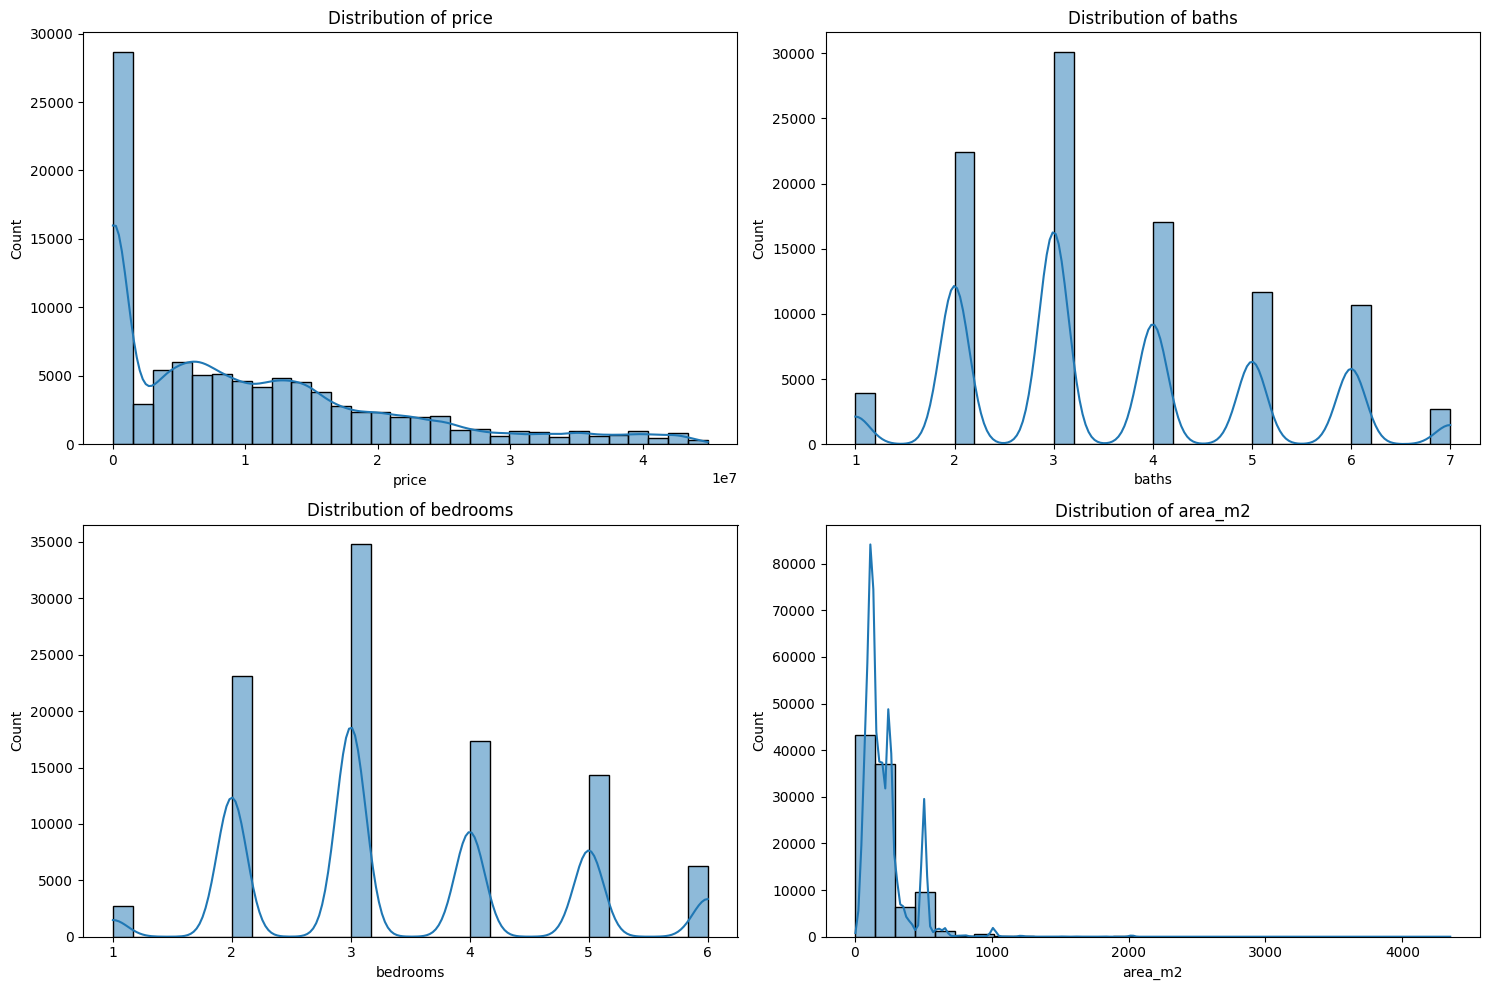

In [33]:
#Plotting Distribution values in df[numerical_features]

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [34]:
df[numerical_features].describe()

,price,baths,bedrooms,area_m2
count,9.861800e+04,98618.000000,98618.000000,98618.000000
mean,1.040182e+07,3.538867,3.366677,219.820388
std,1.065957e+07,1.470380,1.241120,176.696678
min,1.550000e+04,1.000000,1.000000,5.000000
25%,1.500000e+05,2.000000,2.000000,121.000000
50%,7.500000e+06,3.000000,3.000000,172.000000
75%,1.570000e+07,5.000000,4.000000,253.000000
max,4.490000e+07,7.000000,6.000000,4350.000000


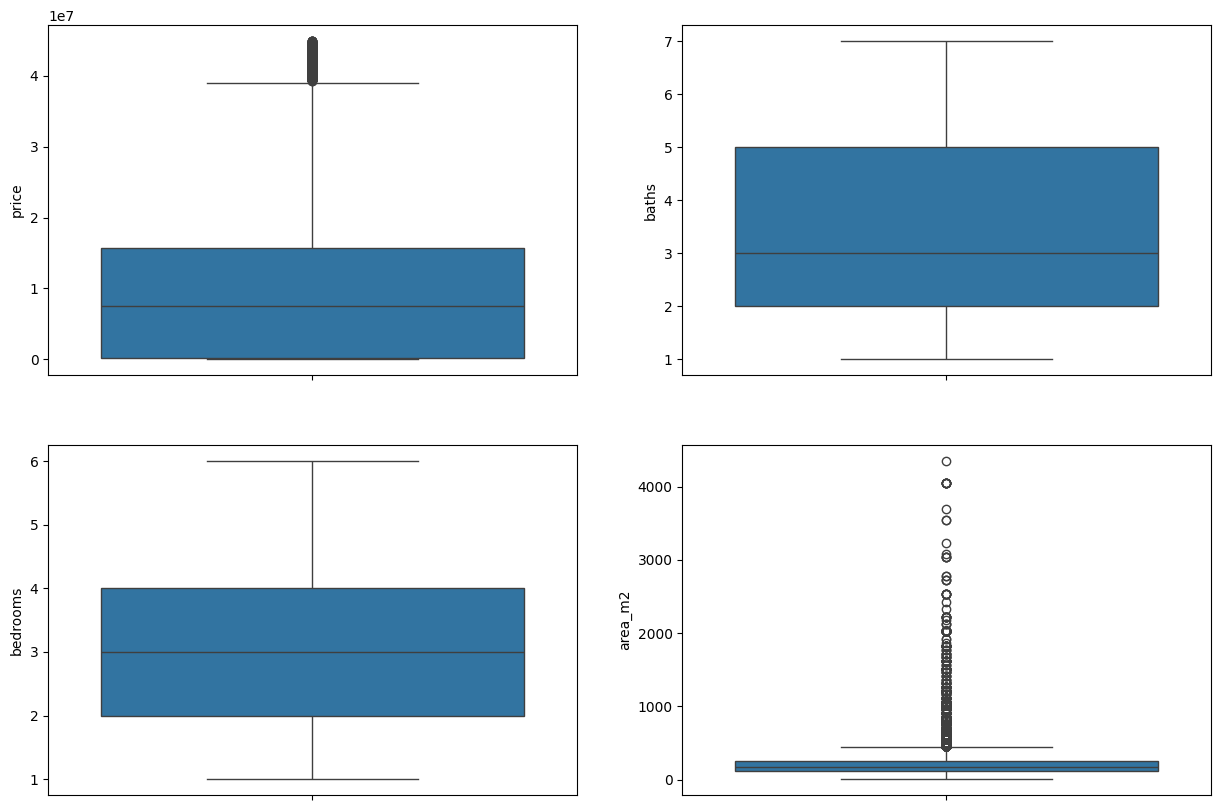

In [35]:
# Boxplot to see the outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[column])

In [36]:
# Removing the outliers
for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

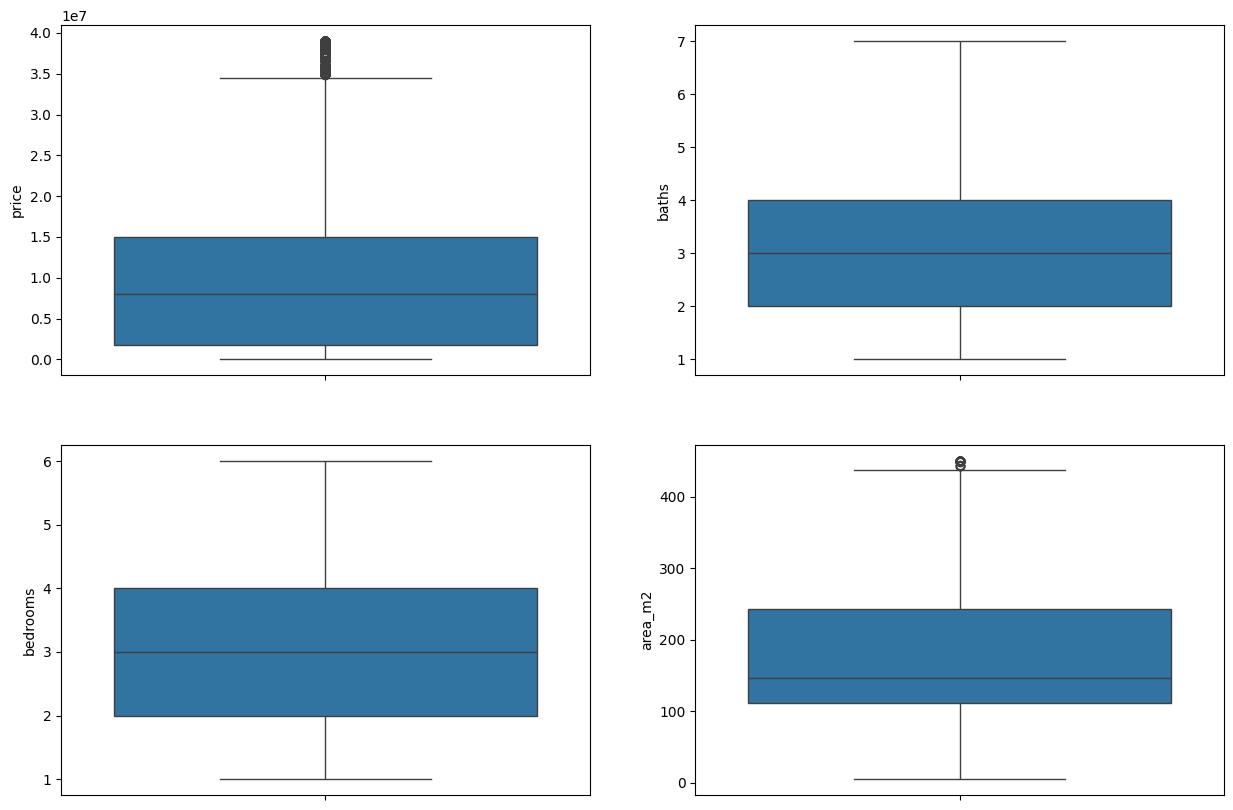

In [37]:
# Boxplot to see after droping the outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[column])

In [38]:
df.shape

(85899, 8)

#### **Bivariate Analysis**

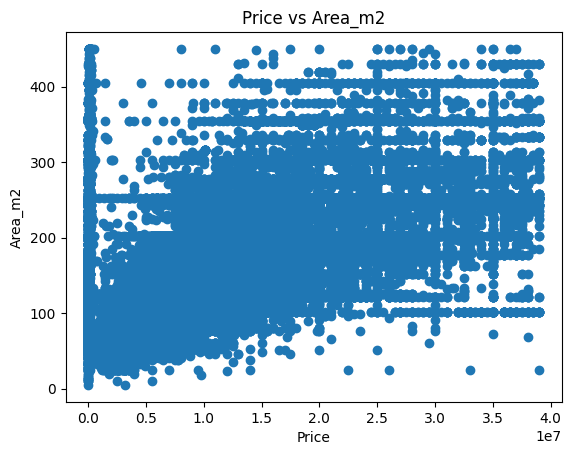

In [39]:
#Ploting a scatter plot to show a price and the area_m2
plt.scatter(df['price'], df['area_m2'])
plt.xlabel('Price')
plt.ylabel('Area_m2')
plt.title('Price vs Area_m2')
plt.show()

<Axes: xlabel='baths', ylabel='count'>

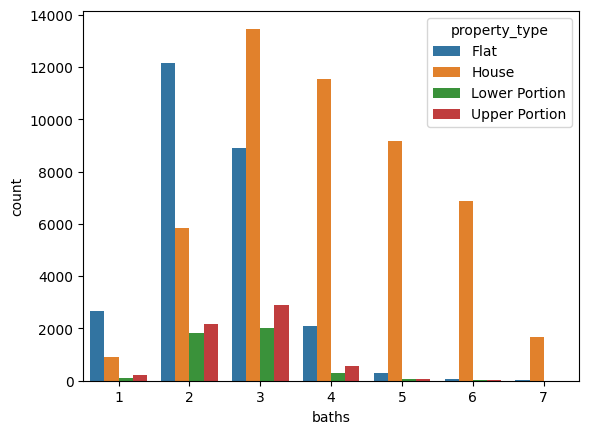

In [40]:
sns.countplot(data=df, x='baths', hue='property_type')

<Axes: xlabel='bedrooms', ylabel='count'>

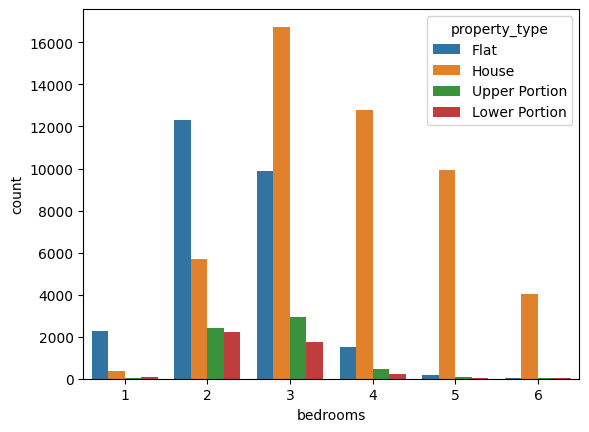

In [41]:
sns.countplot(data=df, x='bedrooms', hue='property_type')

<Axes: xlabel='purpose', ylabel='count'>

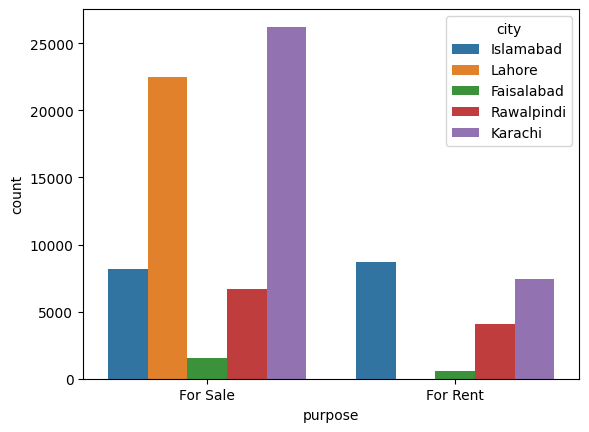

In [42]:
sns.countplot(data=df, x='purpose', hue='city')

Finding correlation from numerical_features

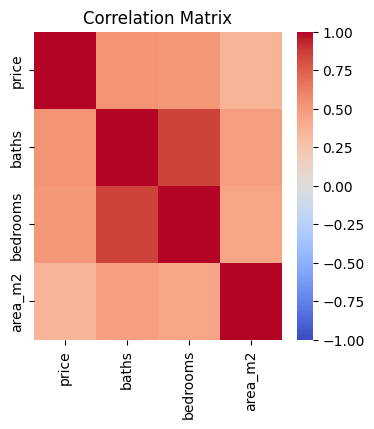

In [43]:
# Visualization of correlation between numerical variables
plt.figure(figsize=(4, 4))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

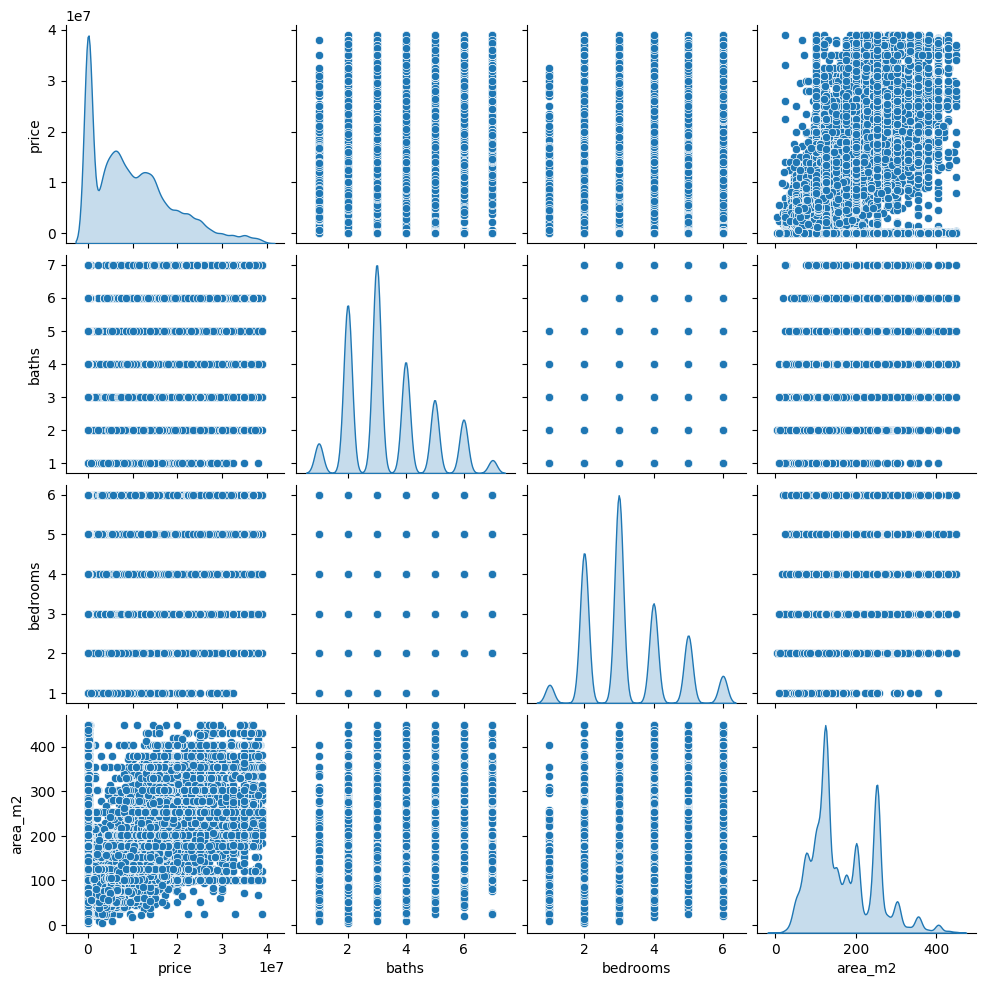

<Figure size 400x400 with 0 Axes>

In [44]:
# Observe the relationship between numerical features with the pairplot() function
sns.pairplot(df, diag_kind = 'kde')
plt.figure(figsize=(4, 4))
plt.show()

### **Data Preprocessing**
 (Normalization & Standardization)

In [45]:
df.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,area_m2
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,101.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,142.0
2,House,16500000,G-15,Islamabad,6,For Sale,5,202.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,202.0
5,Flat,7800000,E-11,Islamabad,2,For Sale,2,157.0


In [46]:
df_sampled = df.sample(n=10000, random_state=42)

In [47]:
df_sampled.purpose.value_counts()

,count
purpose,
For Sale,7484
For Rent,2516


In [48]:
df_sampled.property_type.value_counts()

,count
property_type,
House,5706
Flat,3101
Upper Portion,676
Lower Portion,517


In [49]:
X = df_sampled[['price','area_m2','baths','bedrooms','property_type']]

In [50]:
X

,price,area_m2,baths,bedrooms,property_type
17296,38000,253.0,3,3,Flat
64789,11500000,126.0,3,3,House
45022,6500000,76.0,3,3,House
9982,15000000,253.0,6,5,House
81022,42000,303.0,3,3,Upper Portion
...,...,...,...,...,...
47134,12500000,126.0,4,3,House
17507,15500000,253.0,5,4,House
91953,9000000,126.0,3,3,House
64105,25000000,303.0,6,6,House


**One Hot Encoding and Min Max Scaler**

In [51]:
dummies = pd.get_dummies(X['property_type'])

In [52]:
num_feat = X[['price','area_m2','baths','bedrooms']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [53]:
num_feat

,price,area_m2,baths,bedrooms
17296,0.000577,0.552273,0.333333,0.4
64789,0.294591,0.263636,0.333333,0.4
45022,0.166335,0.150000,0.333333,0.4
9982,0.384371,0.552273,0.833333,0.8
81022,0.000680,0.665909,0.333333,0.4
...,...,...,...,...
47134,0.320243,0.263636,0.500000,0.4
17507,0.397196,0.552273,0.666667,0.6
91953,0.230463,0.263636,0.333333,0.4
64105,0.640883,0.665909,0.833333,1.0


In [54]:
data = pd.concat([num_feat, dummies], axis=1)

In [55]:
data

,price,area_m2,baths,bedrooms,Flat,House,Lower Portion,Upper Portion
17296,0.000577,0.552273,0.333333,0.4,True,False,False,False
64789,0.294591,0.263636,0.333333,0.4,False,True,False,False
45022,0.166335,0.150000,0.333333,0.4,False,True,False,False
9982,0.384371,0.552273,0.833333,0.8,False,True,False,False
81022,0.000680,0.665909,0.333333,0.4,False,False,False,True
...,...,...,...,...,...,...,...,...
47134,0.320243,0.263636,0.500000,0.4,False,True,False,False
17507,0.397196,0.552273,0.666667,0.6,False,True,False,False
91953,0.230463,0.263636,0.333333,0.4,False,True,False,False
64105,0.640883,0.665909,0.833333,1.0,False,True,False,False


## **Modeling**

In [56]:
elbow_data = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    elbow_data.append(kmeans.inertia_)

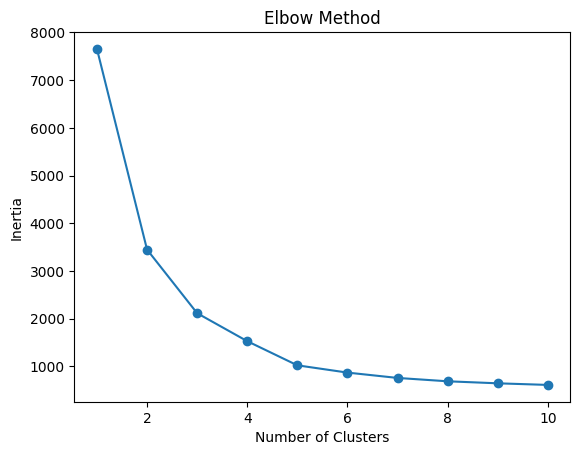

In [57]:
plt.plot(range(1, 11), elbow_data, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, verbose=1)
clusters = kmeans.fit_predict(data)

Initialization complete
Iteration 0, inertia 3026.6014015000414.
Iteration 1, inertia 2210.548422383825.
Iteration 2, inertia 2114.298689853078.
Converged at iteration 2: strict convergence.


Initialization complete
Iteration 0, inertia 3026.6014015000414.
Iteration 1, inertia 2210.548422383825.
Iteration 2, inertia 2114.298689853078.
Converged at iteration 2: strict convergence.


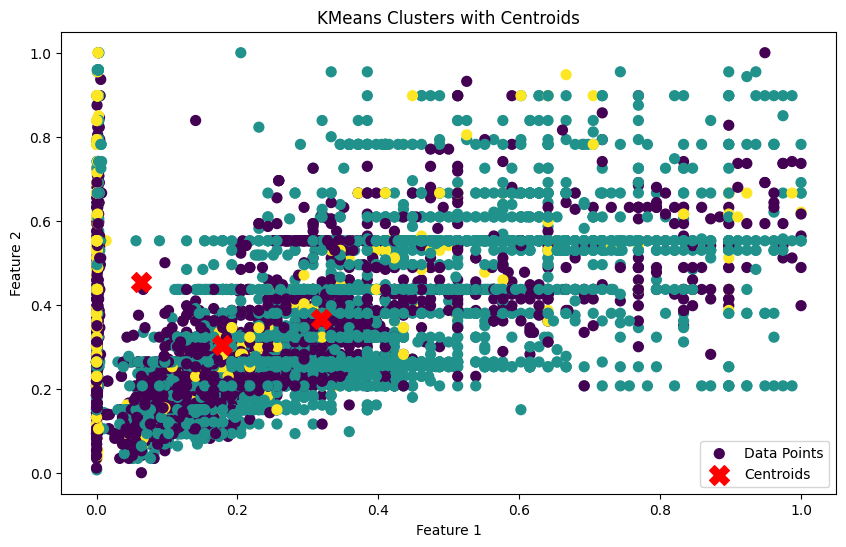

In [59]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, verbose=1)
clusters = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Plot data dan centroid
plt.figure(figsize=(10, 6))
plt.scatter(data['price'], data['area_m2'], c=clusters, cmap='viridis', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clusters with Centroids')
plt.legend()
plt.show()

## **Evaluation**

#### **Silhouette Score**

In [60]:
silhoute_kmeans = silhouette_score(data, clusters,metric='euclidean')
print(f'Silhouette Score: {silhoute_kmeans}')

Silhouette Score: 0.6406396384941534


#### **KMeans Cluster**

In [61]:
df_hasil = df_sampled.copy()

In [62]:
df_hasil['cluster'] = clusters

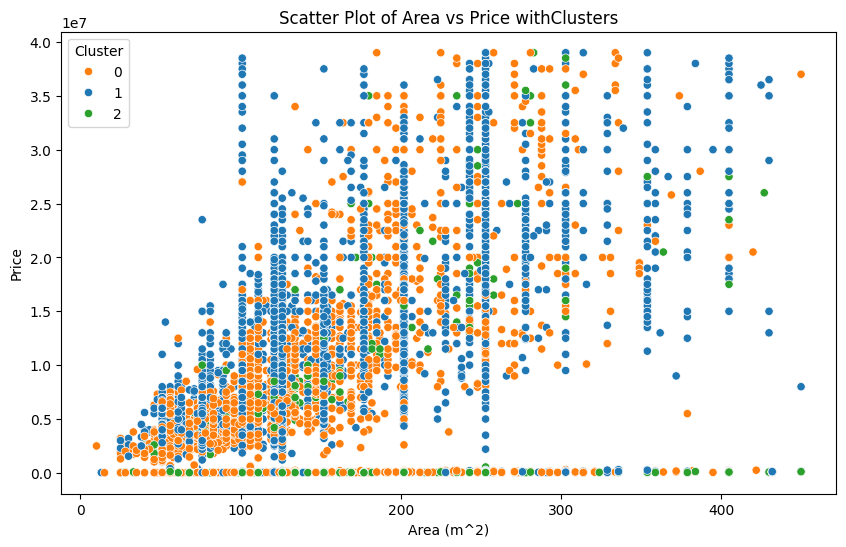

In [63]:
# Color Palette
palette = ['#FF7F0E', '#1F77B4', '#2CA02C']

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hasil, x='area_m2', y='price', hue='cluster', palette=palette)
plt.title("Scatter Plot of Area vs Price withClusters")
plt.xlabel("Area (m^2)")
plt.ylabel("Price")
plt.legend(title='Cluster')
plt.show()

**PCA with 2 Component**

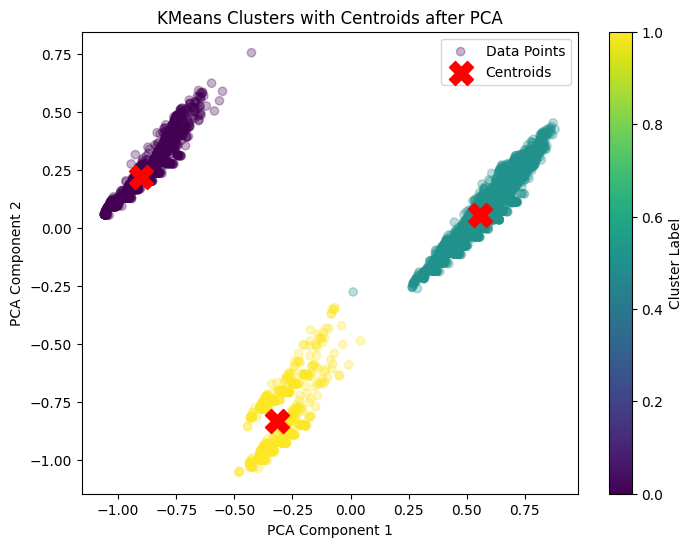

In [66]:
pca = PCA(n_components=2)
data_pca_2d = pca.fit_transform(data)

# Mengaplikasikan KMeans pada data PCA
n_clusters = 3  # Tentukan jumlah cluster
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters_pca_2d = kmeans.fit_predict(data_pca_2d)
centroids_pca_2d = kmeans.cluster_centers_

# Plot data dan centroid
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=clusters_pca_2d, cmap='viridis', marker='o', label='Data Points', alpha=0.3)
plt.scatter(centroids_pca_2d[:, 0], centroids_pca_2d[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clusters with Centroids after PCA')
plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()

In [67]:
silhoute_pca_2d = silhouette_score(data_pca_2d, clusters_pca_2d, metric='euclidean')
print(f'Silhouette Score: {silhoute_pca_2d}')

Silhouette Score: 0.8469981548705929


In [82]:
pca = PCA(n_components=2)
data_pca_2d = pca.fit_transform(data)

# Get PCA components
pca_components = pca.components_

# Create a DataFrame with loadings
loading_df = pd.DataFrame(pca_components, columns=data.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(loading_df)

# Optionally, print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

        price   area_m2     baths  bedrooms      Flat     House  \
PC1  0.140520  0.056715  0.219692  0.226836 -0.618122  0.701231   
PC2  0.313429 -0.009622  0.206405  0.203781  0.588901  0.273598   

     Lower Portion  Upper Portion  
PC1      -0.035842      -0.047266  
PC2      -0.321871      -0.540628  
Explained Variance Ratio: [0.59195925 0.15089651]


**PCA with 3 Component**

In [69]:
import plotly.express as px
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 3 Components PCA
pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters_pca_3d = kmeans.fit_predict(data_pca_3d)
centroids_pca_3d = kmeans.cluster_centers_

# Using Plotly
import pandas as pd
df_plot = pd.DataFrame(data_pca_3d, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df_plot['Cluster'] = clusters_pca_3d

# Plot data points
fig = px.scatter_3d(df_plot, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster',
                    title="3D PCA Projection with KMeans Clustering")

# Plot centroids using 'X' mark
for i in range(n_clusters):
    fig.add_trace(go.Scatter3d(x=[centroids_pca_3d[i, 0]], y=[centroids_pca_3d[i, 1]], z=[centroids_pca_3d[i, 2]],
                               mode='markers', marker=dict(size=10, color='red', symbol='x'), name=f'Centroid {i+1}'))

fig.update_layout(scene=dict(
                    xaxis_title='PCA Component 1',
                    yaxis_title='PCA Component 2',
                    zaxis_title='PCA Component 3'))
fig.show()

In [70]:
silhoute_pca_3d = silhouette_score(data_pca_3d, clusters_pca_3d, metric='euclidean')
print(f'Silhouette Score: {silhoute_pca_3d}')

Silhouette Score: 0.7283445973681782


**comparison of silhouette score results**

In [71]:
result = pd.DataFrame({'Silhouette Score': [silhoute_kmeans, silhoute_pca_2d, silhoute_pca_3d]})
result.index = ['KMeans', 'KMeans + PCA 2D', ' KMeans + PCA 3D']
result

,Silhouette Score
KMeans,0.640640
KMeans + PCA 2D,0.846998
KMeans + PCA 3D,0.728345


**Visualization**

In [72]:
df_result = df_sampled.copy()

In [73]:
df_result['Cluster'] = clusters_pca_2d

<ipython-input-80-6212f93f2fed>:1: UserWarning:

The palette list has more values (5) than needed (3), which may not be intended.



<Axes: xlabel='area_m2', ylabel='price'>

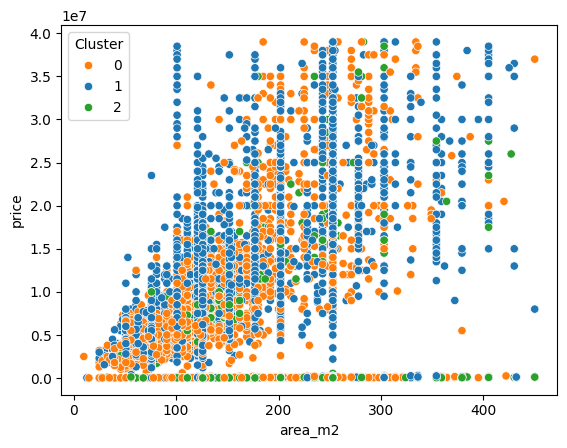

In [80]:
sns.scatterplot(data=df_result, x='area_m2', y='price', hue='Cluster', palette=palette)

### **Analysis and Interpretation of Cluster Results**

In [84]:
grouped_stats = df_result.groupby('Cluster').agg(
    mean_price=('price', 'mean'),
    median_price=('price', 'median'),
    mean_area=('area_m2', 'mean'),
    median_area=('area_m2', 'median'),
    mean_baths=('baths', 'mean'),
    median_baths=('baths', 'median'),
    mean_bedrooms=('bedrooms', 'mean'),
    median_bedrooms=('bedrooms', 'median')
).round(2)
print(grouped_stats)

          mean_price  median_price  mean_area  median_area  mean_baths  \
Cluster                                                                  
0         6956958.72     5000000.0     144.30        124.0        2.44   
1        12458026.11    12000000.0     171.58        152.0        3.99   
2         2436430.37       42500.0     209.48        202.0        2.69   

         median_baths  mean_bedrooms  median_bedrooms  
Cluster                                                
0                 2.0           2.42              2.0  
1                 4.0           3.76              4.0  
2                 3.0           2.65              3.0  


*   'Cluster 0 ' : **Medium Affordable Properties**: For properties with medium prices and small sizes.

*   'Cluster 1 ' : **Large Luxury Properties**: For properties with high prices and large sizes.

*   'Cluster 2' **Cheap Affordable Properties**: For properties with low prices but medium sizes.

In [85]:
df_result['Cluster'] = df_result['Cluster'].replace({0: 'Medium Affordable Properties',1: 'Large Luxury Properties', 2: 'Cheap Affordable Properties'})

In [86]:
df_result.head(5)

,property_type,price,location,city,baths,purpose,bedrooms,area_m2,Cluster
17296,Flat,38000,DHA Defence,Islamabad,3,For Rent,3,253.0,Medium Affordable Properties
64789,House,11500000,Wapda Town,Lahore,3,For Sale,3,126.0,Large Luxury Properties
45022,House,6500000,Lahore Medical Housing Society,Lahore,3,For Sale,3,76.0,Large Luxury Properties
9982,House,15000000,Bahria Town,Lahore,6,For Sale,5,253.0,Large Luxury Properties
81022,Upper Portion,42000,Gulistan-e-Jauhar,Karachi,3,For Rent,3,303.0,Cheap Affordable Properties


<Axes: xlabel='property_type', ylabel='count'>

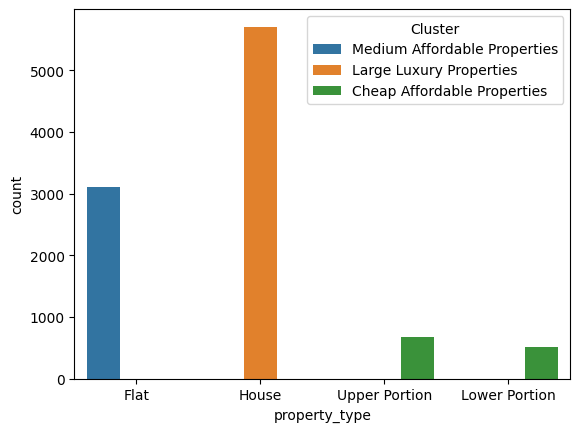

In [88]:
sns.countplot(data=df_result, x='property_type', hue='Cluster')

<Axes: xlabel='Cluster', ylabel='count'>

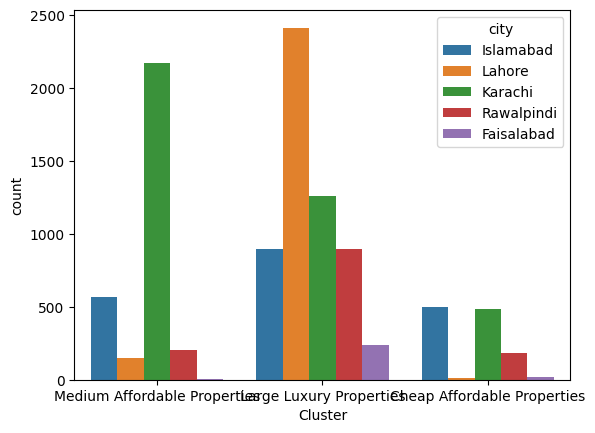

In [89]:
sns.countplot(data=df_result, x='Cluster', hue='city')

<Axes: xlabel='bedrooms', ylabel='count'>

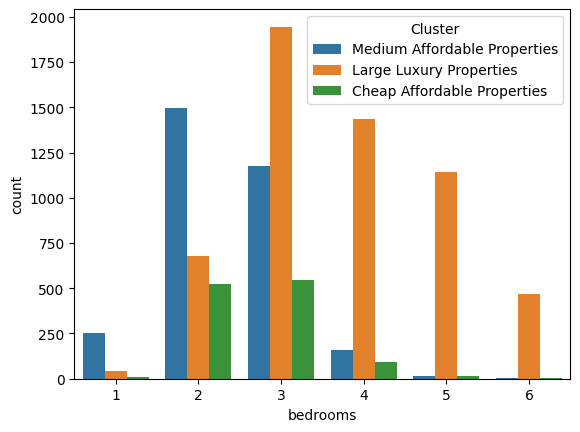

In [91]:
sns.countplot(data=df_result, x='bedrooms', hue='Cluster')

<Axes: xlabel='baths', ylabel='count'>

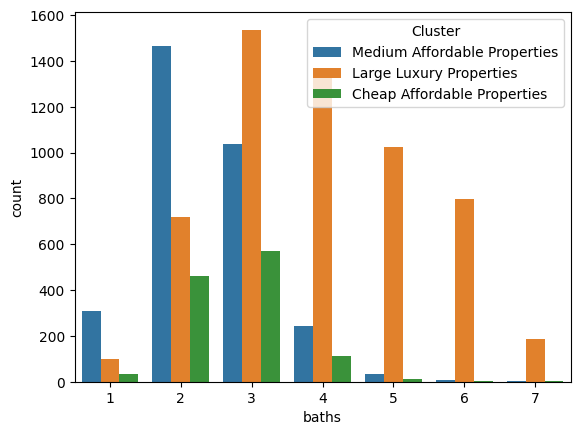

In [92]:
sns.countplot(data=df_result, x='baths', hue='Cluster')

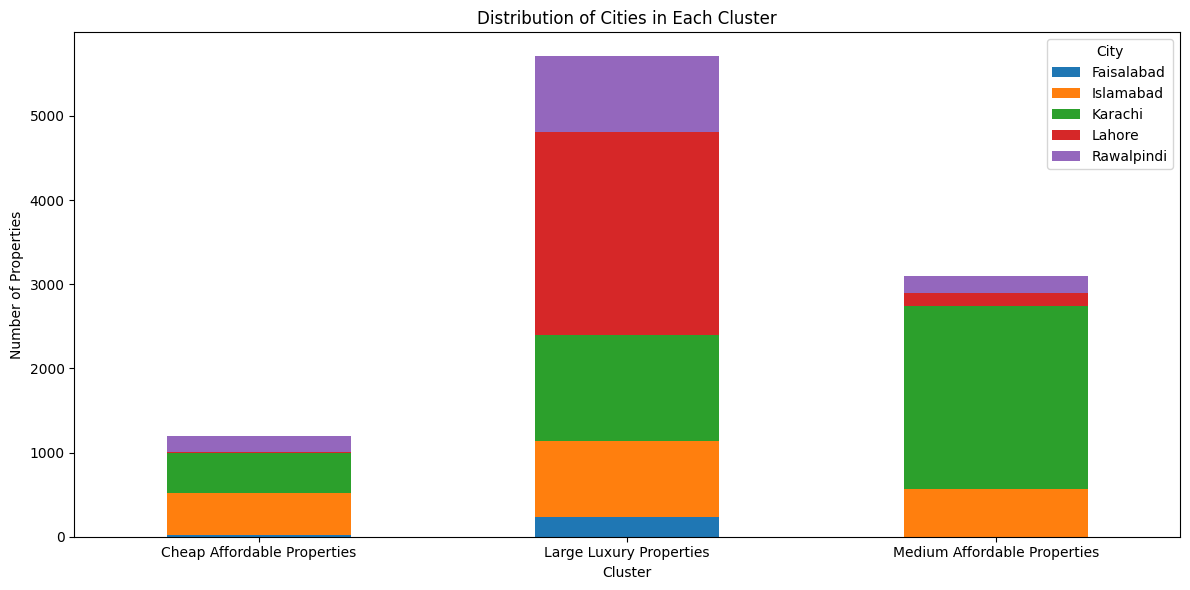

In [98]:
city_counts = df_result.groupby('Cluster')['city'].value_counts().unstack(fill_value=0)

# Plotting the results
city_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Cities in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Properties')
plt.legend(title='City')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='Cluster', ylabel='price'>

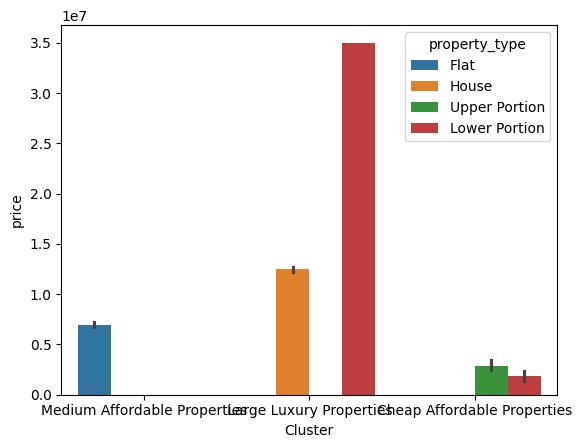

In [94]:
sns.barplot(data=df_result, x='Cluster', y='price', hue='property_type')

**Actionable Insight**


1.   This clustering is based on the features in the column that most influence the cluster.

2.   Large Luxury Properties are of the property type 'House', while 'Cheap Affordable properties' are mostly property_type 'upper portion'
or 'lower portion', and Medium Affordable properties tend to be of the 'Flat' type'.

3. The more expensive a property is, the more complete it is and the more features it has. As in the barchart above, the 'Large Luxury Properties' cluster tends to have more features than the other two clusters.

## **Deployment**

At the deployment stage we do not save the model with pickle or other versions. However, we store CSV data that will be processed for classification model cases.

In [95]:
# Exporting Clustering Dataset to csv file
df_result.to_csv('house_cluster.csv', index=False)